<a href="https://colab.research.google.com/github/iffathsaleem/Customer-Churn-Prediction-at-Telco/blob/main/Decison_Tree_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/clean_train.csv")
df

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,outlet_city_encoded
0,10493832.0,Kelaniya,1209.60,756.00,5292.00,4,11
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1,13
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4,19
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4,19
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4,11
...,...,...,...,...,...,...,...
774140,10197979.0,Gampaha,3893.40,3893.40,3448.44,3,4
774141,10494575.0,Katunayake,6095.86,5557.99,6275.15,3,10
774142,10565682.0,Colombo,5121.42,4820.16,4669.53,3,1
774143,10351977.0,Kandy,6311.76,6311.76,5940.48,3,9


In [ ]:
from sklearn.preprocessing import LabelEncoder
# 1. Identify categorical features:
categorical_features = df.select_dtypes(include=['object']).columns

# 2. Create a LabelEncoder for each categorical feature:
encoders = {}
for feature in categorical_features:
    encoders[feature] = LabelEncoder()
    df[feature] = encoders[feature].fit_transform(df[feature])

In [ ]:
X = df.drop('cluster_catgeory', axis=1)
X

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,outlet_city_encoded
0,10493832.0,11,1209.60,756.00,5292.00,11
1,10178643.0,13,1590.12,1060.08,6007.12,13
2,10513916.0,19,2288.88,1481.04,9155.52,19
3,10334589.0,19,2274.94,1739.66,9099.76,19
4,10458365.0,11,2345.49,2069.55,9243.99,11
...,...,...,...,...,...,...
774140,10197979.0,4,3893.40,3893.40,3448.44,4
774141,10494575.0,10,6095.86,5557.99,6275.15,10
774142,10565682.0,1,5121.42,4820.16,4669.53,1
774143,10351977.0,9,6311.76,6311.76,5940.48,9


In [ ]:
Y = df['cluster_catgeory']
Y

,cluster_catgeory
0,4
1,1
2,4
3,4
4,4
...,...
774140,3
774141,3
774142,3
774143,3


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1, stratify=Y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_d = DecisionTreeClassifier()
dt_d.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
Y_pred = dt_d.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.9981863932994725

In [ ]:
from sklearn.metrics import accuracy_score
Y_train_pred = dt_d.predict(X_train)
accuracy_score(Y_train, Y_train_pred)

1.0

In [ ]:
from sklearn.metrics import accuracy_score
Y_test_pred = dt_d.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.9981863932994725

In [ ]:
#Create a confusion matrix to analyse the performance of the DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[47167,     3,     6,    67,     1,     1],
       [    0, 38696,     1,     2,     1,    66],
       [    3,     4, 12208,     0,     8,     4],
       [   62,     2,     2, 43036,     6,     2],
       [    1,     7,     6,     9,  9858,     4],
       [    3,    72,     1,     4,     3, 42221]])

In [ ]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     47245
           2       1.00      1.00      1.00     38766
           3       1.00      1.00      1.00     12227
           4       1.00      1.00      1.00     43110
           5       1.00      1.00      1.00      9885
           6       1.00      1.00      1.00     42304

    accuracy                           1.00    193537
   macro avg       1.00      1.00      1.00    193537
weighted avg       1.00      1.00      1.00    193537



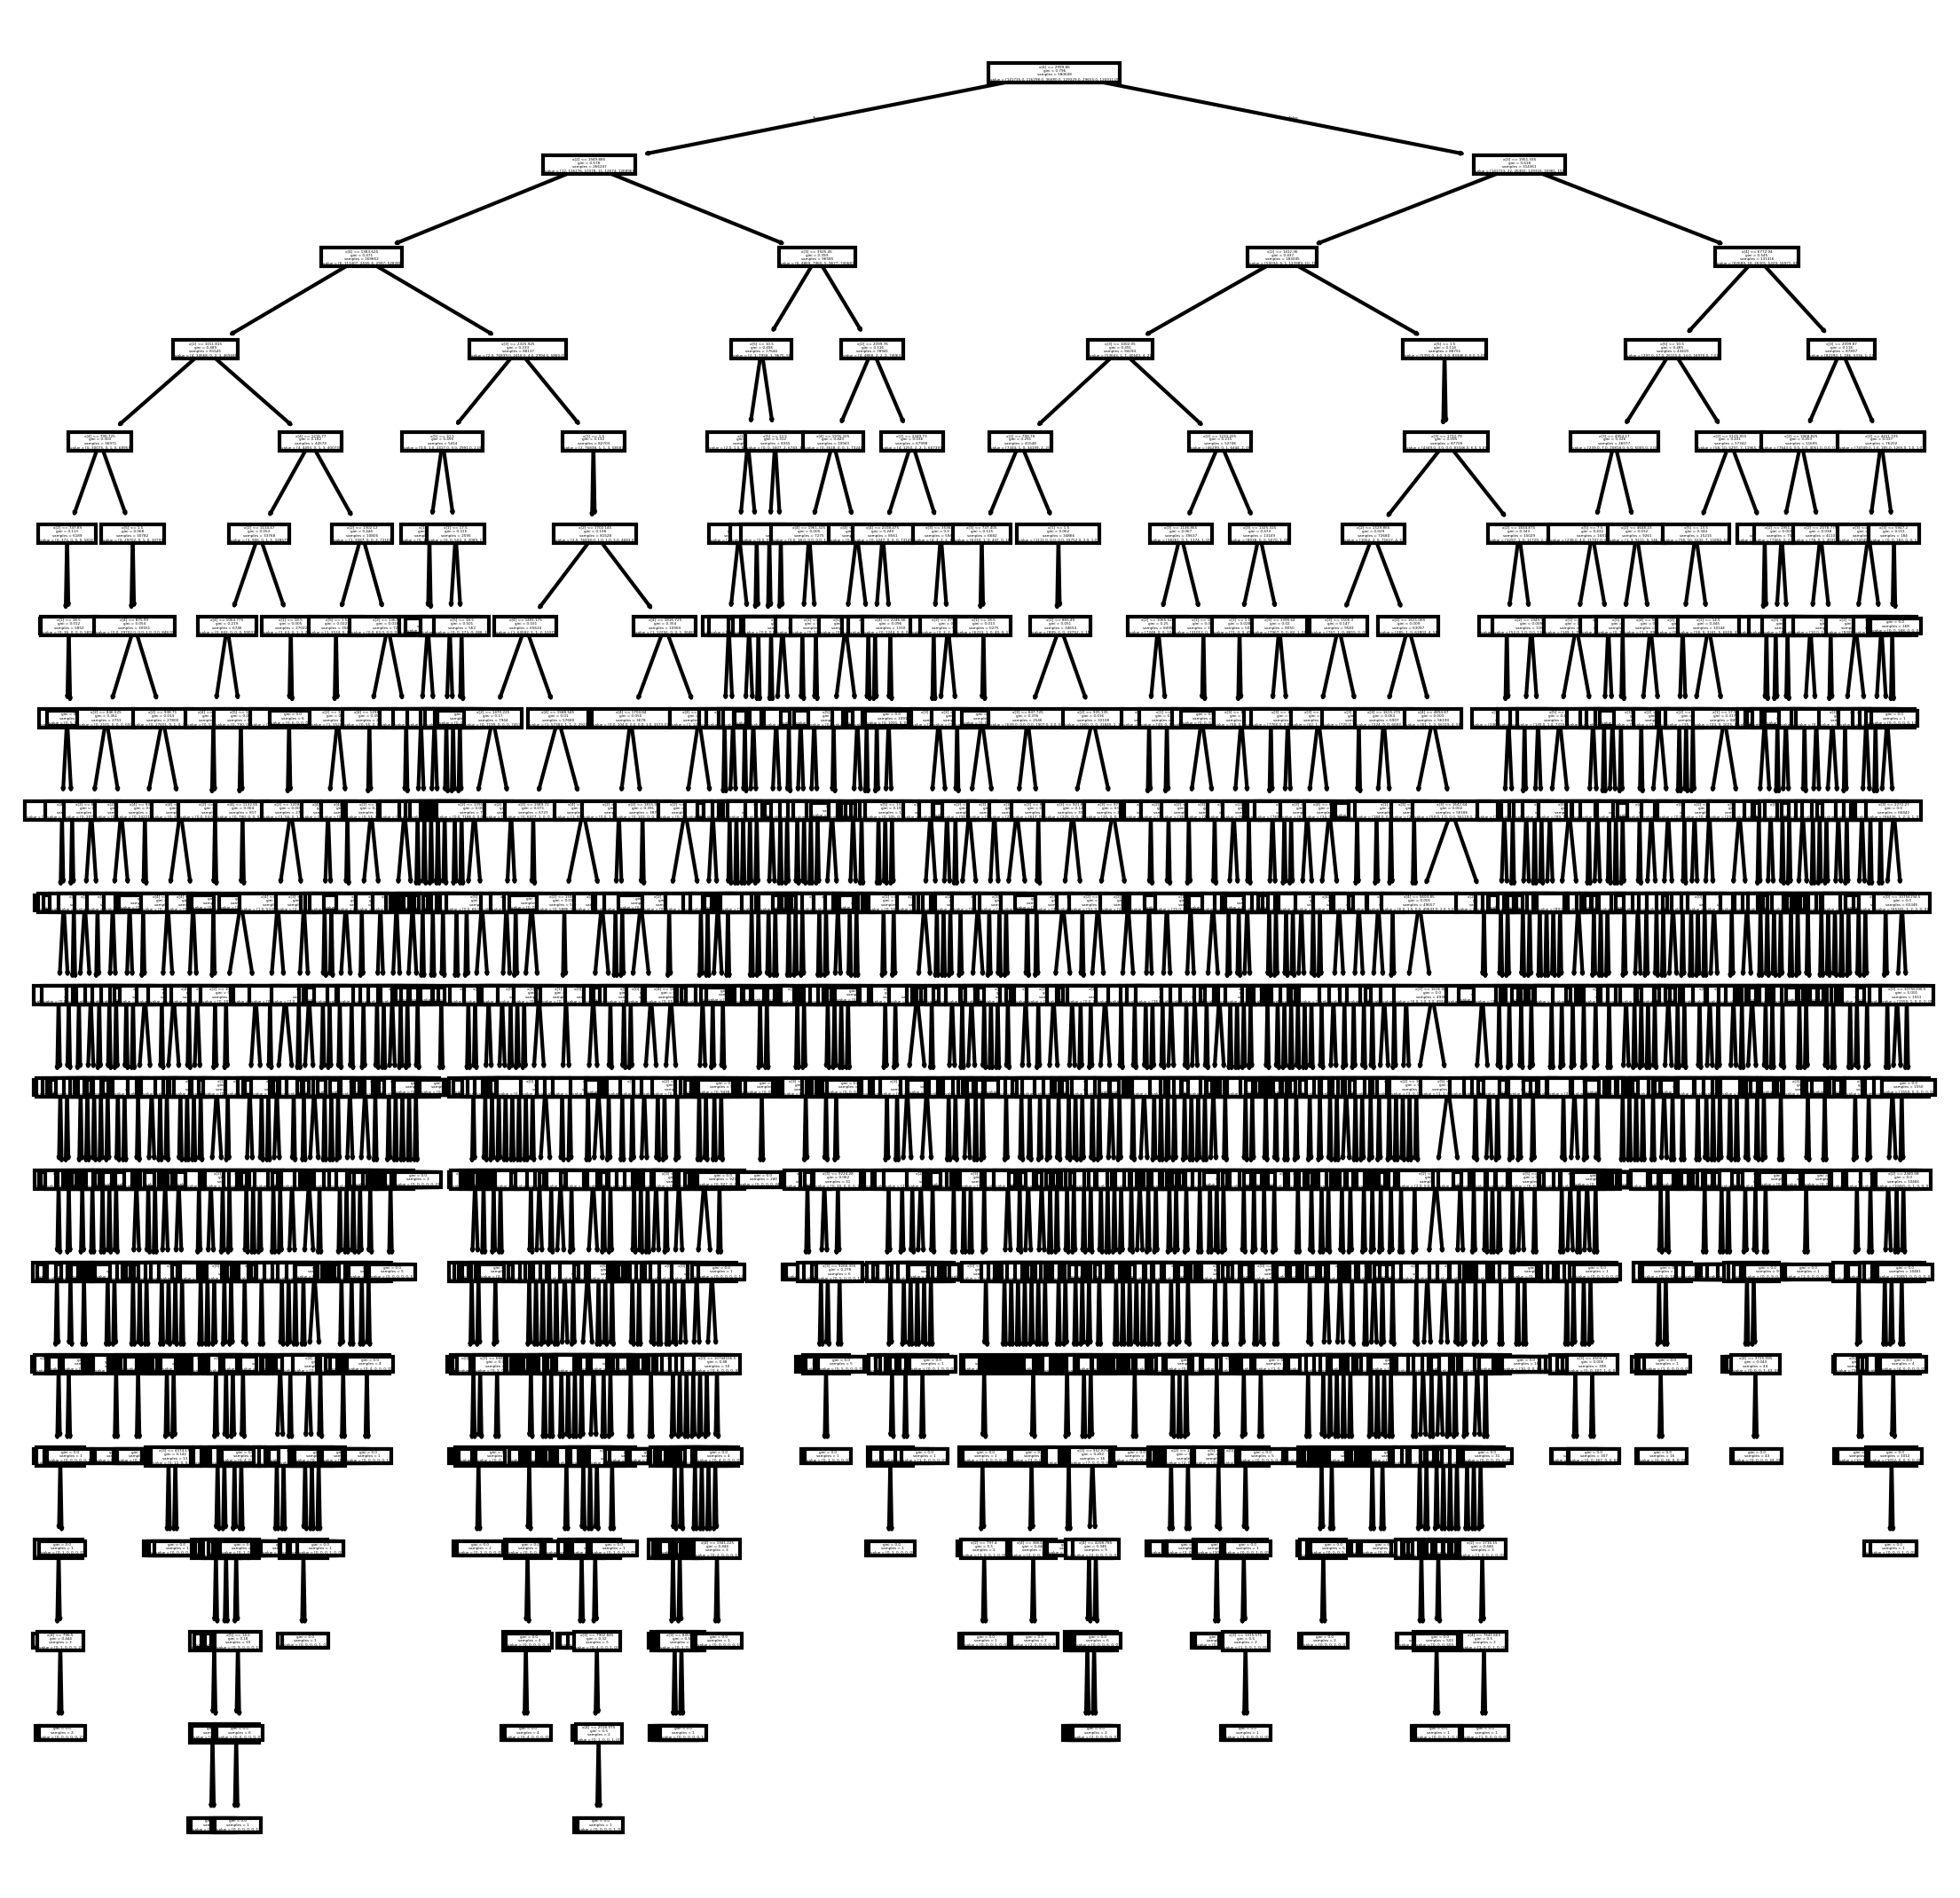

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 9), dpi=300)
tree.plot_tree(dt_d)
plt.show()